In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
BATCH_SIZE = 32 

In [3]:
directory_path = r"C:\Users\shreyash\Documents\project\x-ray"
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory_path,
    seed=123,
    shuffle=True,
    image_size=(32, 32), 
    batch_size=BATCH_SIZE
)

Found 6902 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['covid', 'normal', 'pneumonia']

All:       6902
COVID19:   2276
Normal:    2313
Pneumonia: 2313



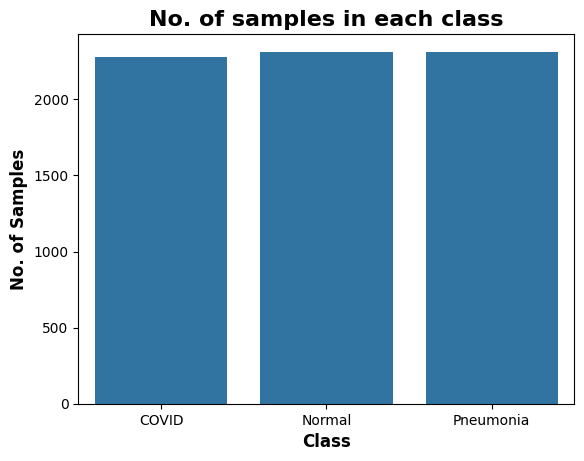

In [5]:
len_covid = 0
len_normal = 0
len_pneumonia = 0

# Count samples in each class
for images, labels in dataset:
    len_covid += tf.reduce_sum(tf.cast(labels == 0, tf.int32))
    len_normal += tf.reduce_sum(tf.cast(labels == 1, tf.int32))
    len_pneumonia += tf.reduce_sum(tf.cast(labels == 2, tf.int32))

len_covid = len_covid.numpy()
len_normal = len_normal.numpy()
len_pneumonia = len_pneumonia.numpy()

# Plotting
classes = ['COVID', 'Normal', 'Pneumonia']
no_samples = [len_covid, len_normal, len_pneumonia]

ax = sns.barplot(x=classes, y=no_samples)
ax.set_title(label='No. of samples in each class', weight='bold', fontsize=16)
ax.set_xlabel(xlabel='Class', weight='bold', fontsize=12)
ax.set_ylabel(ylabel='No. of Samples', weight='bold', fontsize=12)

print(f'All:       {len_covid + len_normal + len_pneumonia}')
print(f'COVID19:   {len_covid}')
print(f'Normal:    {len_normal}')
print(f'Pneumonia: {len_pneumonia}\n')

plt.show()

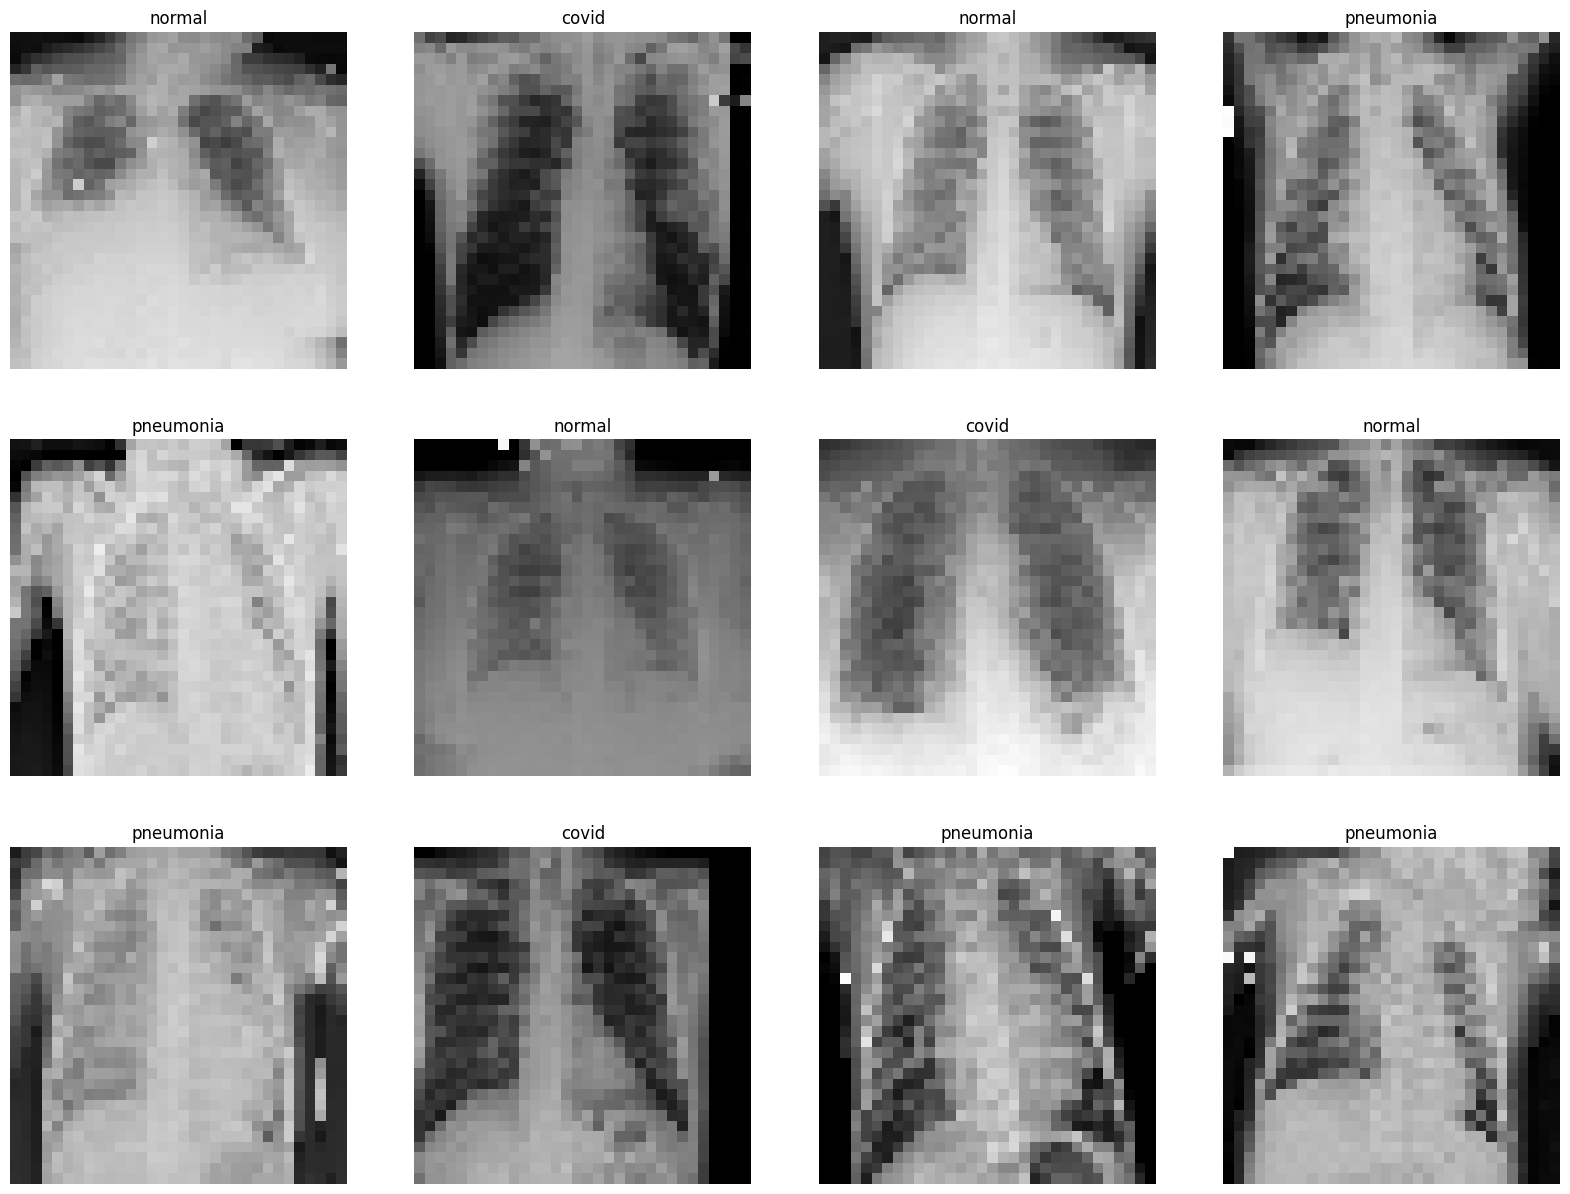

In [6]:
plt.figure(figsize=(20, 15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [7]:
len(dataset)

216

In [8]:
train_size = 0.8
len(dataset)*train_size

172.8

In [9]:
train_ds = dataset.take(172)
len(train_ds)

172

In [10]:
test_ds = dataset.skip(172)
len(test_ds)

44

In [11]:
val_size=0.1
len(dataset)*val_size

21.6

In [12]:
val_ds = test_ds.take(21)
len(val_ds)

21

In [13]:
test_ds = test_ds.skip(21)
len(test_ds)

23

In [14]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [15]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [16]:
len(train_ds)

172

In [17]:
len(val_ds)

21

In [18]:
len(test_ds)

23

In [19]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
X_train, y_train = [], []
X_val, y_val = [], []
X_test, y_test = [], []

for X_batch, y_batch in train_ds:
    X_train.append(X_batch.numpy())
    y_train.append(y_batch.numpy())

for X_batch, y_batch in val_ds:
    X_val.append(X_batch.numpy())
    y_val.append(y_batch.numpy())

for X_batch, y_batch in test_ds:
    X_test.append(X_batch.numpy())
    y_test.append(y_batch.numpy())

# Concatenate batches
X_train = np.concatenate(X_train)
y_train = np.concatenate(y_train)
X_val = np.concatenate(X_val)
y_val = np.concatenate(y_val)
X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test)


In [21]:
# Train the model
ann.fit(X_train, y_train, epochs=10)

Epoch 1/10


172/172 [==============================] - 5s 25ms/step - loss: nan - accuracy: 0.3284
Epoch 2/10
172/172 [==============================] - 4s 25ms/step - loss: nan - accuracy: 0.3291
Epoch 3/10
172/172 [==============================] - 4s 25ms/step - loss: nan - accuracy: 0.3291
Epoch 4/10
172/172 [==============================] - 4s 25ms/step - loss: nan - accuracy: 0.3291
Epoch 5/10
172/172 [==============================] - 4s 25ms/step - loss: nan - accuracy: 0.3291
Epoch 6/10
172/172 [==============================] - 4s 25ms/step - loss: nan - accuracy: 0.3291
Epoch 7/10
172/172 [==============================] - 4s 26ms/step - loss: nan - accuracy: 0.3291
Epoch 8/10
172/172 [==============================] - 4s 25ms/step - loss: nan - accuracy: 0.3291
Epoch 9/10
172/172 [==============================] - 4s 25ms/step - loss: nan - accuracy: 0.3291
Epoch 10/10
172/172 [==============================] - 4s 25ms/step - loss: nan - accuracy: 0.3291


In [22]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

23/23 [==============================] - 0s 5ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.30      1.00      0.46       222
           1       0.00      0.00      0.00       250
           2       0.00      0.00      0.00       264

    accuracy                           0.30       736
   macro avg       0.10      0.33      0.15       736
weighted avg       0.09      0.30      0.14       736



C:\Users\shreyash\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shreyash\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shreyash\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [23]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
172/172 [==============================] - 2s 6ms/step - loss: 1.8489 - accuracy: 0.7235
Epoch 2/10
172/172 [==============================] - 1s 6ms/step - loss: 0.4885 - accuracy: 0.8336
Epoch 3/10
172/172 [==============================] - 1s 5ms/step - loss: 0.3630 - accuracy: 0.8735
Epoch 4/10
172/172 [==============================] - 1s 6ms/step - loss: 0.3219 - accuracy: 0.8910
Epoch 5/10
172/172 [==============================] - 1s 6ms/step - loss: 0.2668 - accuracy: 0.9068
Epoch 6/10
172/172 [==============================] - 1s 6ms/step - loss: 0.2900 - accuracy: 0.9008
Epoch 7/10
172/172 [==============================] - 1s 6ms/step - loss: 0.2582 - accuracy: 0.9103
Epoch 8/10
172/172 [==============================] - 1s 6ms/step - loss: 0.2242 - accuracy: 0.9243
Epoch 9/10
172/172 [==============================] - 1s 6ms/step - loss: 0.2026 - accuracy: 0.9317
Epoch 10/10
172/172 [==============================] - 1s 6ms/step - loss: 0.1756 - accuracy: 0.9428

In [25]:
cnn.evaluate(X_test,y_test)

23/23 [==============================] - 0s 3ms/step - loss: 0.2013 - accuracy: 0.9402


[0.2013019472360611, 0.9402173757553101]

In [26]:
y_pred = cnn.predict(X_test)
y_pred[:5]

23/23 [==============================] - 0s 3ms/step


array([[6.67390297e-04, 2.02023471e-03, 9.97304797e-01, 2.24528580e-14,
        1.37397089e-08, 7.56669851e-06, 1.00864616e-13, 1.64016509e-11,
        1.52702082e-08, 1.04609294e-13],
       [9.99999523e-01, 7.57003633e-08, 3.94227214e-07, 4.40135451e-26,
        4.55618361e-18, 3.70305999e-12, 1.80141111e-28, 3.31109945e-23,
        2.02342700e-13, 2.93430060e-30],
       [8.08504240e-07, 9.99204099e-01, 7.95120606e-04, 3.32506489e-16,
        2.57271114e-12, 3.48604772e-08, 2.76237147e-19, 1.02989936e-13,
        2.72649570e-10, 1.52802562e-18],
       [3.98917526e-01, 5.51459849e-01, 4.94277216e-02, 7.15100867e-10,
        1.08714823e-06, 7.52123233e-05, 5.18108195e-11, 1.69188766e-07,
        1.18442564e-04, 7.24434263e-11],
       [7.12458759e-10, 6.08064001e-03, 9.93919373e-01, 9.78804313e-25,
        1.45807676e-14, 7.02705338e-10, 2.69246663e-27, 6.96990492e-22,
        2.10108081e-14, 6.99896643e-24]], dtype=float32)

In [27]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[2, 0, 1, 1, 2]

In [28]:
y_test[:5]

array([2, 0, 1, 0, 2])

Epoch 1/10
172/172 [==============================] - 1s 7ms/step - loss: 0.1852 - accuracy: 0.9357 - val_loss: 0.1967 - val_accuracy: 0.9271
Epoch 2/10
172/172 [==============================] - 1s 7ms/step - loss: 0.1655 - accuracy: 0.9388 - val_loss: 0.2681 - val_accuracy: 0.9315
Epoch 3/10
172/172 [==============================] - 1s 7ms/step - loss: 0.1430 - accuracy: 0.9512 - val_loss: 0.1491 - val_accuracy: 0.9598
Epoch 4/10
172/172 [==============================] - 1s 8ms/step - loss: 0.1328 - accuracy: 0.9523 - val_loss: 0.1435 - val_accuracy: 0.9554
Epoch 5/10
172/172 [==============================] - 1s 8ms/step - loss: 0.1093 - accuracy: 0.9636 - val_loss: 0.1635 - val_accuracy: 0.9583
Epoch 6/10
172/172 [==============================] - 1s 8ms/step - loss: 0.1295 - accuracy: 0.9539 - val_loss: 0.1659 - val_accuracy: 0.9420
Epoch 7/10
172/172 [==============================] - 1s 8ms/step - loss: 0.1403 - accuracy: 0.9512 - val_loss: 0.2305 - val_accuracy: 0.9062
Epoch 

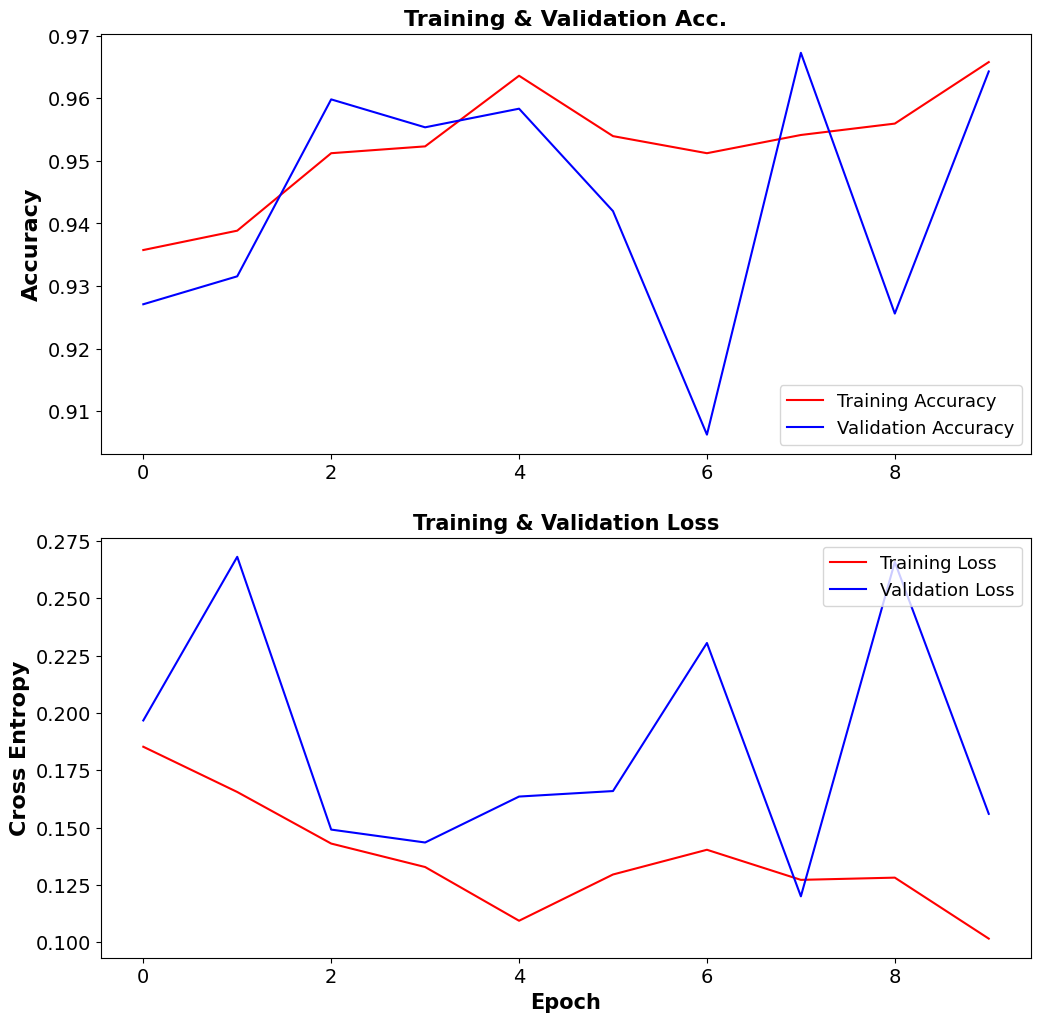

In [29]:
history = cnn.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Extract training and validation metrics
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting
plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(train_acc, label='Training Accuracy', color='r')
plt.plot(val_acc, label='Validation Accuracy', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('Accuracy', fontsize=16, weight='bold')
plt.title('Training & Validation Acc.', fontsize=16, weight='bold')

plt.subplot(2, 1, 2)
plt.plot(train_loss, label='Training Loss', color='r')
plt.plot(val_loss, label='Validation Loss', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('Training & Validation Loss', fontsize=15, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')

plt.show()

In [30]:
predictions = np.argmax(cnn.predict(X_test), axis=-1)
class_names = ['covid', 'normal', 'pneumonia']
class_indices = {class_name: i for i, class_name in enumerate(class_names)}
true_labels_indices = []
for label in y_test:
    true_label_str = class_names[label]  # Convert integer label to string
    true_labels_indices.append(class_indices[true_label_str])
conf_matrix = confusion_matrix(true_labels_indices, predictions)
print("Confusion Matrix:")
print(conf_matrix)

23/23 [==============================] - 0s 4ms/step
Confusion Matrix:
[[215   2   5]
 [  4 238   8]
 [  1  10 253]]


23/23 [==============================] - 0s 4ms/step


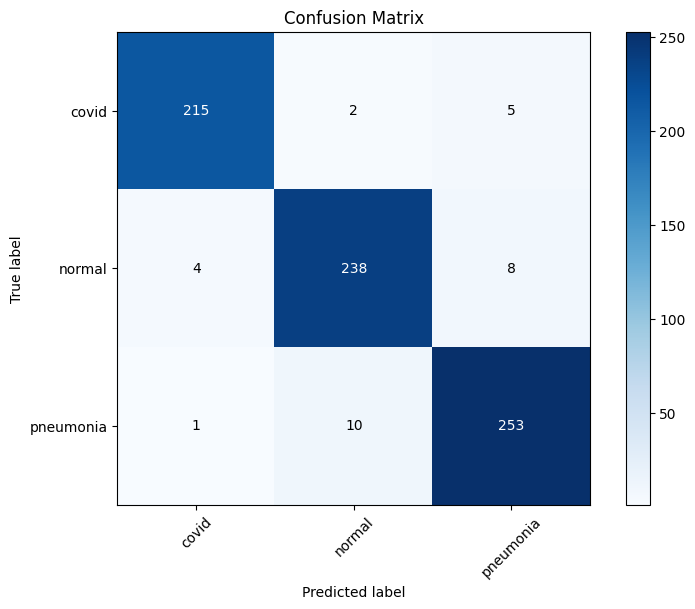

In [31]:
predictions = np.argmax(cnn.predict(X_test), axis=-1)
true_labels_indices = [class_indices[class_names[label]] for label in y_test]
conf_matrix = confusion_matrix(true_labels_indices, predictions)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()